# Evaluación final

### Profesor: Dr. Esteban Vargas
### Alumno: Luis Enrique Reyes Romero
### No. de Cuenta: 311128338

### 04/02/2021

<div class="alert alert-info">
    El proyecto consta de 4 problemas/preguntas, para los cuales se debe proporcionar un breve informe escrito con imágenes y una breve explicación de los resultados. El estudiante debe discutir el informe el 04 de febrero de 2021 en un canal ZOOM. El estudiante le explicará sus resultados y responderá una pregunta sobre las diapositivas del curso.

<strong>Observación:</strong> Proporcione un breve razonamiento en el informe del por qué elige cierto algoritmo. Indique en su informe el nombre completo y el número de cuenta.

El examen oral será una discusión sobre el proyecto, herramientas y una pregunta general. 

Los códigos que utilice para el proyecto deben cargarse en la plataforma antes de la 01:00 pm 04 de febrero de 2021.
</div>

In [1]:
# Para todos los problemas 
# Importamos las librerias
from scipy import stats
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
import seaborn as sns
from random import seed
import numpy.polynomial.polynomial as poly
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

**Problema 1.** Utilizando el conjunto de datos llamado, problem1.csv (x_training, y_training):
    <ol>
      <li>Encuentre el polinomio que mejor se adapte a los datos de entrenamiento.</li>
      <li>Utilizando el criterio de *AIC*, encuentre el mejor polinomio que pueda ajustarse a los datos.</li>
      <li>Usando validación cruzada verifique el polinomio utilizando el conjunto de datos llamado, problem1.csv (x_test, y_test)</li>
    </ol>

***Solución***

Primero cargarenos los datos para visualizar su comportamiento

In [3]:
# Cargamos los datos
datos = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/problem1.csv")
# Separamos los datos
X=datos.loc[:,"X_training"]
Y=datos.loc[:,"Y_training"]
Xt=datos.loc[0:20,"X_test"]
Yt=datos.loc[0:20,"Y_test"]

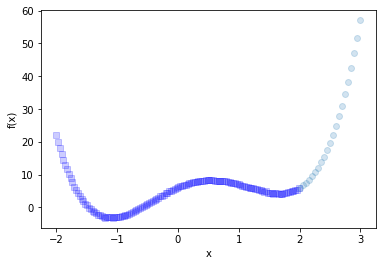

In [4]:
# Graficamos los datos de entrenamiento
ax = plt.plot(X,Y,'bs',alpha=0.2)
plt.plot(Xt,Yt,'o',alpha=0.2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

A simple vista por el número de curvaturas pareciera como si el polinomio ideal a ajustar a todo el conjunto de datos (tanto de entrenamiento como de prueba) fuese uno de grado 4, pero esta conjetura la deberiamos de comprobar, asi que primero hagamos el ajuste polinomial con un polinomio de mayor grado.

In [5]:
# Por ejemplo ajustamos un polinomio de grado 11, pero solo a los datos de entrenamiento
coef = poly.polyfit(X, Y, 11, rcond=None, w=None)
model = poly.Polynomial(coef)
model

Polynomial([ 6.01513045e+00,  8.07591205e+00, -6.16234635e+00, -3.26706338e+00,
        2.31032137e+00,  4.10189335e-01, -2.04796074e-01, -2.62940873e-01,
        5.49724671e-02,  7.26365588e-02, -5.20741653e-03, -7.19627305e-03], domain=[-1,  1], window=[-1,  1])

En este caso podemos ver que los coeficientes de hasta el grado 4 son mayores a 1, a partir de grado 5 todos los coeficientes son menores a 1.

Ahora graficamos el modelo ajustado contra los datos de entrenamiento

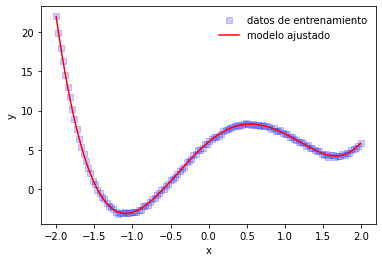

In [6]:
plt.plot(X, Y,'bs',alpha=0.2, label='datos de entrenamiento')
plt.plot(X, model(X),'r', label='modelo ajustado')
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

En este caso podemos ver que el ajuste resulta ser muy bueno para los datos de entrenamiento.

La idea sería ahora ver que pasa con los datos de prueba

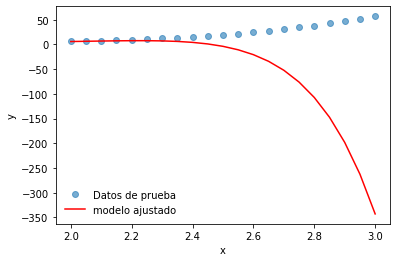

In [7]:
plt.plot(Xt, Yt,'o',alpha=0.6, label='Datos de prueba')
plt.plot(Xt, model(Xt),'r', label='modelo ajustado')
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

En este punto podemos notar que un polinomio de grado 11, no parece ser un buen predictor, pues para observaciones fuera del entrenamiento no tiene un desempeño ideal, pues hay que considerar que este polinomio al ser impar tendrá una caida a futuro y noestros datos de prueba van creciendo, entonces tal vez una mejor aproximación será considerar un polinomio de grado par. 

Una vez visto este comportamiento procederemos a buscar el mejor polinomio que ajuste a nuestro conjunto de datos de entrenamiento.

In [8]:
Pol_Max = 20 # Polinomio de maximo tamaño
# arreglos de ceros en donde almacenaremos RSS y AIC
RSSv = [] 
RSSv = np.zeros(Pol_Max-1)
AICv = []
AICv = np.zeros(Pol_Max-1)
for i in np.arange(0,Pol_Max-1,1):
        coef = poly.polyfit(X, Y, i+1)
        model = poly.Polynomial(coef)
        RSSv[i]=0.5*np.sum((Y-model(X))**2)
        AICv[i]=len(X)*math.log10(RSSv[i]/len(X))+ 2*len(coef)*len(X)/(len(X)-len(coef)-1)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


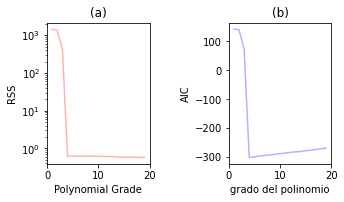

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.arange(0,Pol_Max-1,1)+1, RSSv,'r',alpha=0.3)
ax1.set_yscale('log')
ax1.legend(loc='best', frameon=False)
ax1.set(xlabel='Polynomial Grade', ylabel='RSS')
ax1.set(xlim=(0, Pol_Max))
ax1.set_title('(a)')
# Second #figure
fig.tight_layout(pad=5.0)
ax2.plot(np.arange(0,Pol_Max-1,1)+1, AICv,'b',alpha=0.3)
ax2.set(xlabel='grado del polinomio', ylabel='RSS')
ax2.legend(loc='best', frameon=False)
ax2.set(xlabel='grado del polinomio', ylabel='AIC')
ax2.set(xlim=(0, Pol_Max))
ax2.set_title('(b)')
plt.show()

In [10]:
grado = np.argmin(AICv)+1
grado

4

Como podemos ver el mejor polinomio según el criterio de información de Akaike (AIC) es un polinomio de grado 4

In [11]:
coef=poly.polyfit(X, Y, grado)
model=poly.Polynomial(coef)
model

Polynomial([ 6.0000592 ,  8.02956741, -5.99141415, -3.00869471,  1.99588109], domain=[-1,  1], window=[-1,  1])

En este cao los coeficientes del polinomio son mayores a 1.

Por otro lado cuando contrastamos este modelo contra los datos de prueba obtenemos lo siguiente:

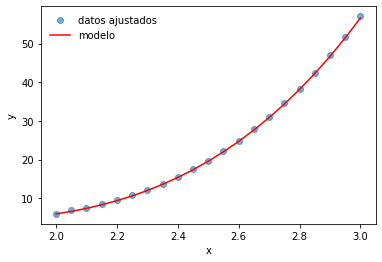

In [12]:
plt.plot(Xt, Yt,'o',alpha=0.6, label='datos ajustados')
plt.plot(Xt, model(Xt),'r', label='modelo')
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Aquí podemos ver que el modelo ajusta bien a los datos de prueba, así que parece ser un modelo ideal.

Por último procederemos a validar el modelo con validación cruzada.

In [13]:
# Validación cruzada
test = np.array([Xt,Yt]).T
poli_var = PolynomialFeatures(degree=grado)
X_poli = poli_var.fit_transform(test)
polinom = LinearRegression()
np.mean(cross_val_score(polinom, X_poli, Yt, cv=10))

1.0

En este caso podemos ver que el polinomio de grado 4 parece ser que ajusta bien a los daots.

**Problema 2.** Dada la siguiente tabla lógica

| $X_1$ | $X_2$ | $X_1 \& X_2$ | | $X_1$ | $X_2$ | $X_1 \$ X_2$
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 0 | 0 | 1 | | 0 | 0 | 0 |
| 1 | 0 | 1 | | 1 | 0 | 0 |
| 0 | 1 | 1 | | 0 | 1 | 0 |
| 1 | 1 | 0 | | 1 | 1 | 1 |

Utilice *Keras* para construir una puerta de operador & y <span>$</span> con un perceptrón simple. Si A = [1.001 0 0.001 1], B = [0 1 0 1] y C = [0 1 1 0]. Calcule la operación (A&B) \$ C con el perceptrón.

***Solución***

In [14]:
# colocamos los datos que disponemos
# en este casi x tiene entradas x_1 y x_2 
x_ent = np.array([[0,0],[1,0],[0,1],[1,1]])
# y seria la respuesta esoerada por esta operacion
y_ent = np.array([[1],[1],[1],[0]])
# secuencia de capas
operador_and = Sequential()
# De finimos el modelo de la red, en donde tendremos 4 nodos de dos dimensiones densas
operador_and.add(Dense(4, activation='relu', input_dim=2)) 
operador_and.add(Dense(1, activation='sigmoid')) # salida
# compilamos la red neuronal
operador_and.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
# entrenamos la red neuronal con los datos
operador_and.fit(x_ent, y_ent, epochs=10000,verbose=0)

In [15]:
# probamos nuestra red con los datos de entrenamiento y vemos que resultado obtenemos
y_esti = operador_and.predict(x_ent)
y_esti.round(3)

array([[1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

Como podemos ver, parece ser que nuestra red esta bien entrenada ya que con una prueba obtenemos casi los mismo resultados que en la etapa de entrenamiento.

Ahora procedemos a hacer lo mismo con el otro operador

In [16]:
# y seria la respuesta esoerada por esta operacion
y_ent1 = np.array([[0],[0],[0],[1]])
# creamos una nueva red
operador_dol = Sequential()
# agregamos la estructura de la red
# la primera capa tendra una construccion densa de 4 nodos por 2 entradas
operador_dol.add(Dense(4, activation='relu', input_dim=2))
operador_dol.add(Dense(1, activation='sigmoid')) #salida
# Compilamos la red neuronal
operador_dol.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
# entrenamos nuestra red
operador_dol.fit(x_ent, y_ent1, epochs=10000,verbose=0)

In [17]:
# probamos nuestra red con los datos de entrenamiento y vemos que resultado obtenemos
y_pre = operador_dol.predict(x_ent)
y_pre.round(3)

array([[0.   ],
       [0.007],
       [0.   ],
       [1.   ]], dtype=float32)

Parece ser que nuestra red esta bien entrenada pues nos da valores parecidos a los reales, solo hay pequeñas discrepancias.

Una vez construidas nuestra redes para dicho operdor entos procedemos a resolver la estructura de red (A&B)$C

In [18]:
A = np.array([1.001, 0, 0.001, 1])
B = np.array([0, 1, 0, 1])
AB = np.array([A,B]).T
A_Amp_B = operador_and.predict(AB)
A_A_B=A_Amp_B.ravel()
A_A_B.round(3)

array([1., 1., 1., 0.], dtype=float32)

In [19]:
C = np.array([0,1,1,0])
A_A_B_D_C = np.array([A_A_B,C]).T
respuesta = operador_dol.predict(A_A_B_D_C)
respuesta.round(3)

array([[0.007],
       [1.   ],
       [1.   ],
       [0.   ]], dtype=float32)

**Problema 3.** De un ensayo clínico, tenemos 12 pacientes con infección por VIH. Después del tratamiento, la enfermedad avanzó en 6 pacientes (1) y en 6 pacientes la infección no progresó (0). Se toman cuatro mediciones en los 12 pacientes (edad, niveles de azúcar, niveles de células T y colesterol). ¿Qué medida se puede utilizar como marcador para describir la progresión de la enfermedad? ¿Cuáles serán los criterios para predecir la progresión? Los datos se pueden encontrar en problema3.csv (x_age, x_sugar, x_Tcell, x_cholesterol, result). Organice los datos y explique brevemente sus resultados. La variable "y" (target) es un vector de 0 y 1 para representar la progresión.

***Solución***

Procedemos a cargar la base de datos y veamos su interacción entre las variables

In [20]:
# Cargamos los datos
datos3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/problem3.csv")
datos3.head()

,x_age,x_cholesterol,x_sugar,x_Tcell,y
0,35,220,80,550,0
1,18,240,120,600,0
2,22,260,55,580,0
3,23,220,75,575,0
4,28,180,100,620,0


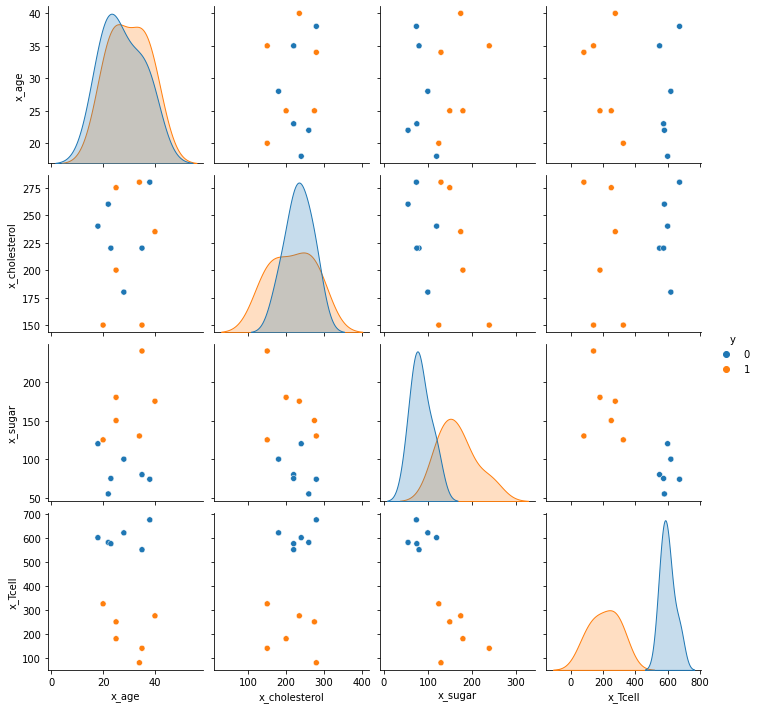

In [21]:
sns.pairplot(datos3, hue='y', markers='o')
plt.show()

En este caso nos enfrentamos a un problema de clasificación, entonces tenemos varias opciones para elegir un modelo obtimo, por diversos estudios de simulación pareciera que la regresión logística tiene un mejor desempeño clasificador, entonces elegiremos este modelo, entonces por lo visto en la gráfica de panel las variables de sugar y Tcell son las variables que logran diferencias de mejor manera a los grupos en donde procreso y no la enfermedad, entonces procederemos a ajustar un modelo con estas variables

Text(0.5, 257.44, 'valor oredicho')

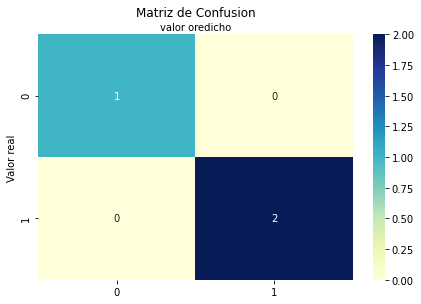

In [22]:
#selecionamos las variables
feature = ['x_sugar', 'x_Tcell']
X = datos3[feature] 
y = datos3.y # respuesta

# hacemos la separación de nuestros datos
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# definimos el modelo de regresion a usar
logreg = LogisticRegression()

# entrenamos nuestro modelo de regresion logistica
logreg.fit(X_train,y_train)

# valores predichos
y_pred=logreg.predict(X_test)

#Matriz de confunsion
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# hacemos el mama de calor
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusion', y=1.1)
plt.ylabel('Valor real')
plt.xlabel('valor oredicho')

In [23]:
# Medidas sobre la matriz de confusion
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


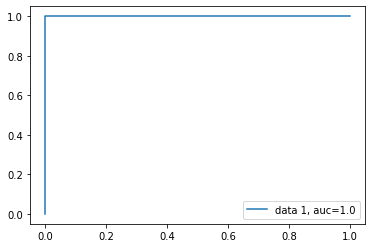

In [24]:
# Curva ROC
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

En este caso podemos ver que el modelo con ambas variables es muy bueno entonces podemos decir que el nivel de azucar en sangre y el número de celulas T nos pueden decir si es posible que el VIH progrese o no en una persona.

**Problema 4.** Usando un perceptrón multicapa con *Keras* genere un cono con la dimensión de su elección. Observación: En otras palabras, utilice la ecuación de un cono y, a continuación, genere datos artificiales para crear X, Y y Z. Luego use los datos de X, Y, Z para entrenar una red neuronal y, después, genere la forma de un cono producida por la red neuronal. En su informe debe mencionar la ecuación del cono seleccionado, y las cifras generadas por la ecuación y por su red neuronal.

***Solución***

En este caso buscamos construir un cono, entonces sabemos que la ecuación de un cono es:
$$
\frac{z^2}{c^2}=\frac{x^2}{a^2}+\frac{y^2}{b^2}
$$

In [25]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Cone(x=[1], y=[1], z=[1], u=[1], v=[1], w=[0]))

fig.update_layout(scene_camera_eye=dict(x=-0.76, y=1.8, z=0.92))

fig.show()

In [26]:
a = np.random.uniform(-1,1,1000)
b = np.random.uniform(-1,1,1000)
z = np.sqrt(a**2+b**2)

# Grafica iteractiva
fig = go.Figure(data=[go.Scatter3d(x=a,y=b,z=z,mode='markers')])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))


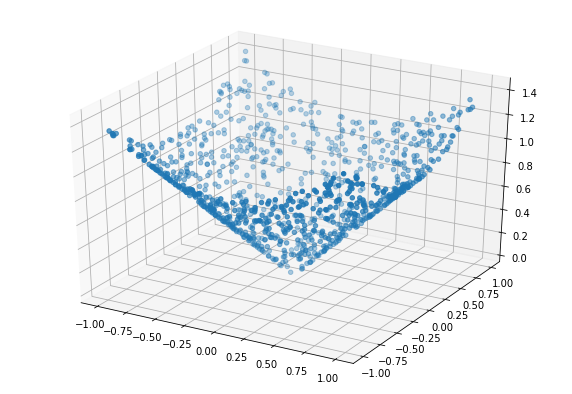

In [27]:
# Grafica fija
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(a, b, z)
plt.show()

In [28]:
# definimos el conjunto de entrenamiento
X_t = np.array([a,b]).T
# Creamos la red neuronal
cono = Sequential()
# Agregamos la estructura de la red
cono.add(Dense(4, activation='relu', input_dim=2)) # first hidden␣layer
cono.add(Dense(4, activation='relu')) # second hidden␣layer
cono.add(Dense(1, activation='relu')) # output layer
# Compilamos la red
cono.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])
# Entrenamos la red
cono.fit(X_t, z, epochs=1000,verbose=0)

In [29]:
a_p = np.random.uniform(-1,1,500)
b_p = np.random.uniform(-1,1,500)
X_p = np.array([a_p,b_p]).T
Z_p = cono.predict(X_p)
Z_p1 = Z_p.ravel()
# Para el gráfico
# Graficamos interactiva los resultados
fig = go.Figure(data=[go.Scatter3d(x=a_p,y=b_p,z=Z_p1,mode='markers')])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))


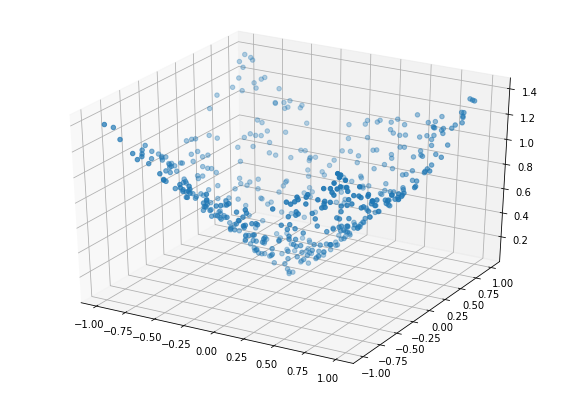

In [30]:
# Grafica fija
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(a_p, b_p, Z_p1)
plt.show()

Como podemos ver la red neuronal parece que ajusta bien a nuevas observaciones y es capaz de reproducir un cono, en este caso a diferencia del problema 2 no obtamos por la regla de salida sigmoide debido a que en este problema buscamos ajustar una función continua y no una clasifiación.